# Insurance Claims- Fraud Detection
# Problem Statement:
# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [19]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [20]:
#READ THE DATASET

df=pd.read_csv('C:/Users/HP/Desktop/data sets/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


- Insurance fraud detection is a challenging problem, given the variety of fraud patterns and relatively small ratio of known frauds in typical samples. While building detection models, the savings from loss prevention needs to be balanced with cost of false alerts. Machine learning techniques allow for improving predictive accuracy, enabling loss control units to achieve higher coverage with low false positive rates. In this project, multiple machine learning techniques for fraud detection are presented and their performance on various data sets examined. The impact of feature engineering and parameter tweaking are explored with the objective of achieving superior predictive performance.
- In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
- The target column in this data set is fraud repoted column which consists of Yes and No,that means a fraud is reported or not.As the target variable is object in nature and have two classes,Thus this problem is classification in nature.
- As we can see that we have both continuous and object type features of the details of the customers.The object type features need to change to numerical datatype before putting into the model for prediction.

In [21]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- we have 1000 unique policy numbers of the customer,so we can conclude that we have the details of 1000 customers.
- The policy details belongs to the people of three states.
- Insured sex gives us the gender details.
- we have 11 different umbrella limit which means a policy that provides excess limits and gives additional excess coverage over the normal limits and coverage of liability policies.
- we got unique seven types of educational level of the customers.
- we got unique fourteen types of occupation of the insured customers.
- we got twenty hobby types of the insured customers.
- There are six types of relationships of the insured customers.
- we got four types of incident type in which the customers will claim for there insurance made.
- we got four types of collision type.
- We got capital gain of the insured customers which is an increase in a capital asset's value and is considered to be realized when the asset is sold.
- we too got the capital loss of the insured customers which is an increase in a capital asset's value and is considered to be realized when the asset is sold.
- There are five authorities that the customers contacted after the accident occured.
- The customer details of this dataset is from the seven states,where the incident occured.
- The customer details of this dataset is from the seven cities.,where the incident occured.
- we got the hour of the day in which the incident occured.
- we got the details of the number  of vehicles involved in an accident.
- we also got three tpes of each of Property damage details and body injuries details.
- we got the details of the witness present, when the incident occured.
- we got the amount in money of differnt type of claims,like injury claim,property claim and vehicle claim.
- The total claim is enlisted in Total claim column.
- And also we got the information about the vehicle company name,auto model.auto model etc.

In [22]:
df.shape

(1000, 40)

- There are 1000 rows and 40 columns in the dataset.That means we got the details of 1000 customers.

In [23]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

- Found out all the column names of the dataset.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- We can see that the dataset comprises of float,int and object datatype.

In [25]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- We can see that the dataset comprises of float,int and object datatype.

In [26]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


- _c39 is having 0 in count.That means this column is having null values.
- Minimum age of the customer is 19 and max is 64
- Customer who has claimed insurance is maximum 479 months
- Minimum claim amount given is 100 and maximum is 114920
- We have minimum of 1 witnesses and max 3.
- Vehicle claim is minimum 70 and maximum is 79560.
- Umbrella limit,capital gain and capital lossis having skewness.
- The auto years ranges from the year 1995 - 2015.
- There are some customers who didnt claim for property and vehicle.
- The maximum vehicles involved in an accident is four and minimum is one.

In [27]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- There is null values only in _c39 column.As it shows 1000,it  is an empty column,we will delete this column latter.

# Feature engineering:

In [28]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

- There is '?' values in police_report_available column so we will replace the value with Nan and latter fill it.

In [29]:
df.replace('?',np.NaN,inplace=True)

In [30]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

- '?' value is replaced with tha NAN values.

In [31]:
# NOw checking the null values again:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- We can now find that there are null values present in collision type,property damage,police_report_available with the column _c39.

In [32]:
df.drop(['_c39'],axis=1,inplace=True) #DROP ALERT

- Dropped the _c39 column.

In [36]:
# FILLING THE NAN VALUES OF THE CATEGORICAL COLUMN BY USING .MODE:

In [33]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [34]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [540]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [541]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [542]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [543]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [544]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- NOW WE CAN SEE THAT THERE IS NO NULL VALUES PRESENT IN THE DATASET.

- WE WILL SEPARATE THE POLICY BLIND DATE COLUMN INTO Policybind Month,Policybind Year AND 'Policybind Day COLUMN.(CONVERTING THE CATEGORICAL COLUMN INTO NUMERICAL)

In [545]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [546]:
df['Policybind Month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['Policybind Year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['Policybind Day'] = df['policy_bind_date'].dt.day

In [547]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

- Dropping the policy_bind_date column because Policybind Month,Policybind Year and Policybind Day is created separately.

In [548]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policybind Month,Policybind Year,Policybind Day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6


- We can see that Policybind Month,Policybind Year and Policybind Day is created separately.

In [37]:
# SEPARATING THE CONTINUOUS FEATURES:

In [39]:
con_features=df[['months_as_customer','age','policy_number','policy_deductable','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim','auto_year']]

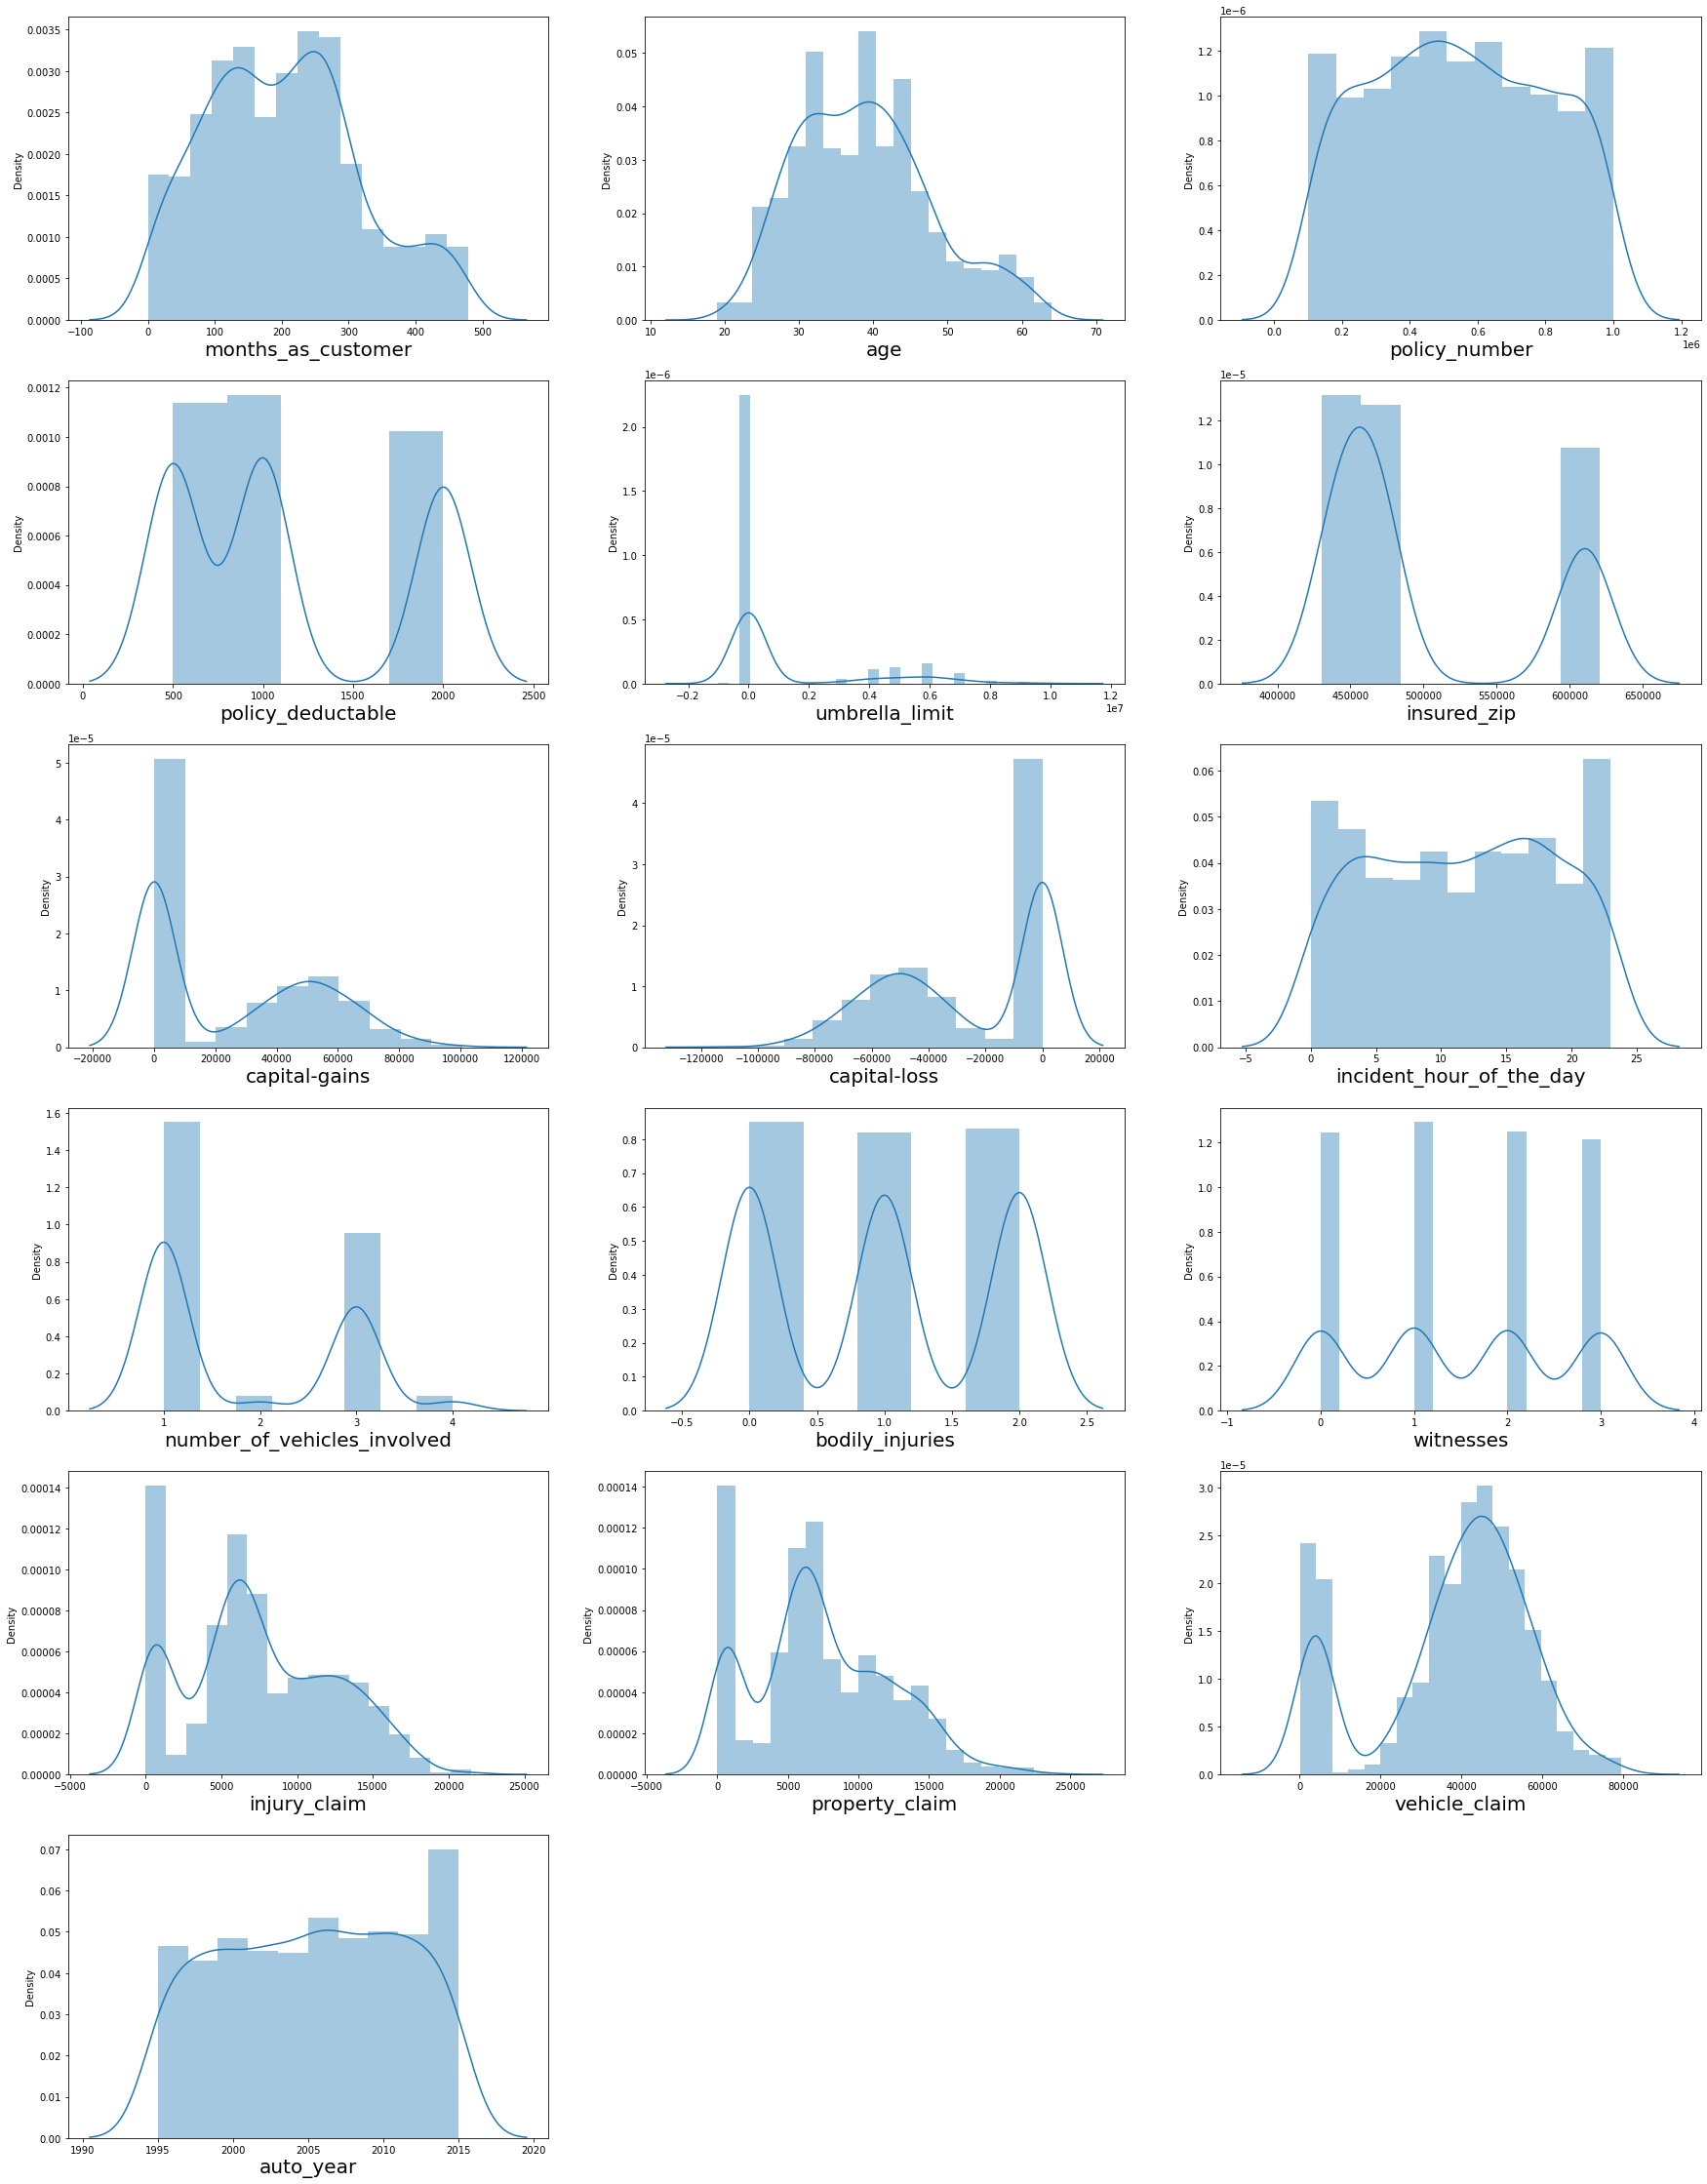

In [40]:
# PLOTTING FOR CHECKING NORMAL DISTRIBUTION:
plt.figure(figsize=(30,40),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- Month as customer,Age,policy number,auto year ,incident hour of the day is showing some sort of normal distribution.
- Rest columns are having skewness.

<AxesSubplot:ylabel='fraud_reported'>

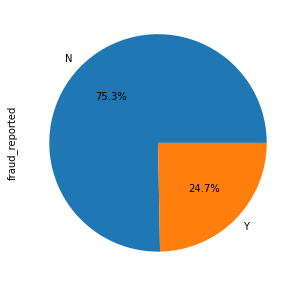

In [551]:
# Plotting fraud_reported column:
df['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- Around 24% of claims reportes were found as fraud.

<AxesSubplot:ylabel='police_report_available'>

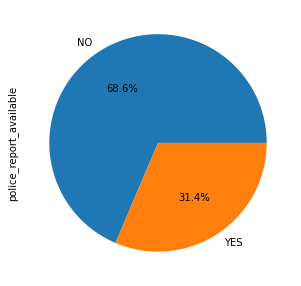

In [552]:
# Plotting the police_report_available column:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- We have 31.4% of the cases where Police report is available and the rest Police reports are missing.

Minimum 0
Maximum 479


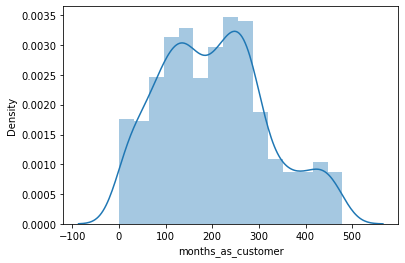

In [553]:
# Plotting the month as customer column:
sns.distplot(df['months_as_customer'])
print('Minimum',df['months_as_customer'].min())
print('Maximum',df['months_as_customer'].max())

- We can find that the customer claimed for insurance for the maximum tenure of 479 months and the minimum is zero.

In [43]:
# Counting the policy_state column:
df.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [44]:
#counting the policy_state variable:

df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

- There are thee policy states which are OH,IL AND IN .The state OH consists of highest number of data.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

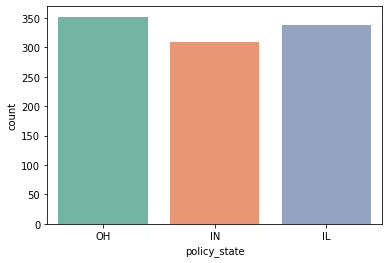

In [556]:
# Plotting the policy_state column:
sns.countplot(df['policy_state'],palette='Set2')

- There are thee policy states which are OH,IL AND IN .The state OH consists of highest number of data.

In [42]:
#counting the policy_csl variable:

df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

- There are three types of policy csl .250/500 having the highest then 100/300 and 500/1000 respectively.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

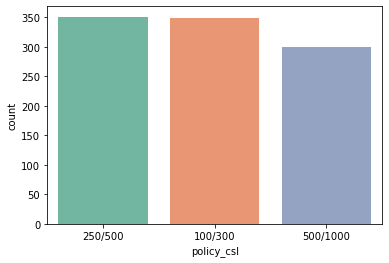

In [45]:
# Plotting the policy_csl column:
sns.countplot(df['policy_csl'],palette='Set2')

- There are three types of policy csl .250/500 having the highest then 100/300 and 500/1000 respectively.

Minimum 500
Maximum 2000


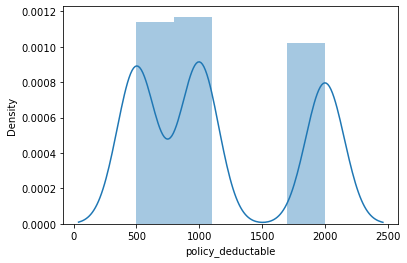

In [46]:
# Plotting the policy deductable column:
sns.distplot(df['policy_deductable'])
print('Minimum',df['policy_deductable'].min())
print('Maximum',df['policy_deductable'].max())

- The Maximum amount of policy_deductable is 2000 and minimum amount is 500.

Minimum 433.33
Maximum 2047.59


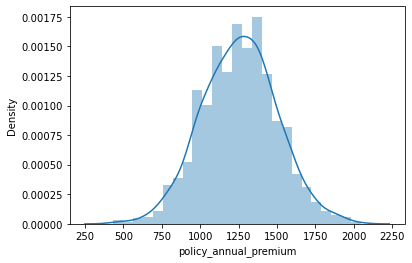

In [47]:
# plotting the policy_annual_premium:
sns.distplot(df['policy_annual_premium'])
print('Minimum',df['policy_annual_premium'].min())
print('Maximum',df['policy_annual_premium'].max())

- To avail the insurance benefit the customers pays the annual premium yearly.The minimum amount fee is 433.33 and the maximum amount for availing insurance is 2047.59.

Minimum -1000000
Maximum 10000000


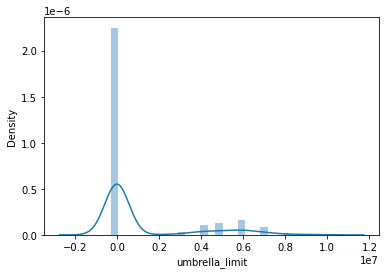

In [48]:
# Plotting the umbrella limit column:
sns.distplot(df['umbrella_limit'])
print('Minimum',df['umbrella_limit'].min())
print('Maximum',df['umbrella_limit'].max())

- The data varies from -1000000 to 10000000 in the umbrella_limit column.

In [49]:
#counting the insured zip column:

df['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

- This integer type column contains the zip code of the customers,which helps in ascertaining the adress of the customers.There are total 995 zip codes.

In [50]:
#counting the insured_sex variable:

df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

- we can see that  mostly cases reported for claim are from females.

<AxesSubplot:ylabel='insured_sex'>

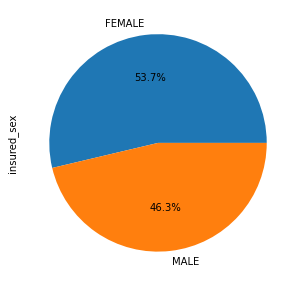

In [51]:
# Plotting the insured sex column:
df['insured_sex'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- 53.7% cases reported for claim are of female.

In [52]:
#counting the insured_education_level variable:

df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

- The highest no of insured customers are JD(Juris doctor) and lowest no of insured customers are having education of college level. 

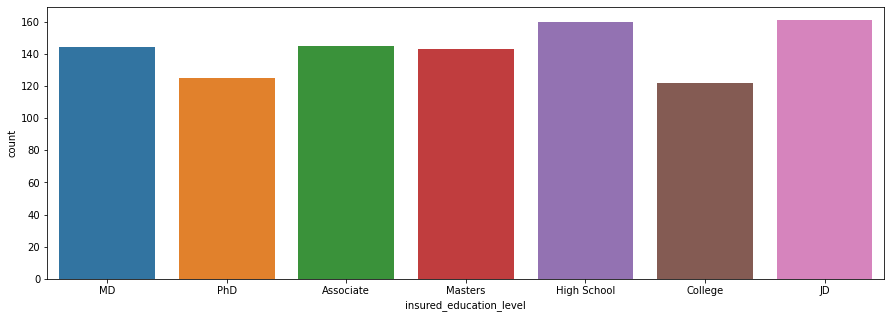

In [53]:
# Plotting insured_education_level column :
plt.figure(figsize=(15,5))
sns.countplot('insured_education_level',data=df)
plt.show()

- The highest no of insured customers are JD(Juris doctor) and lowest no of insured customers are having education of college level.

In [54]:
#counting the insured_occupation variable:

df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

- The highest number of insured customers are in the occupation of machine-op-inspct.
- The lowest number of insured customers are in the occupation of farming-fishing.

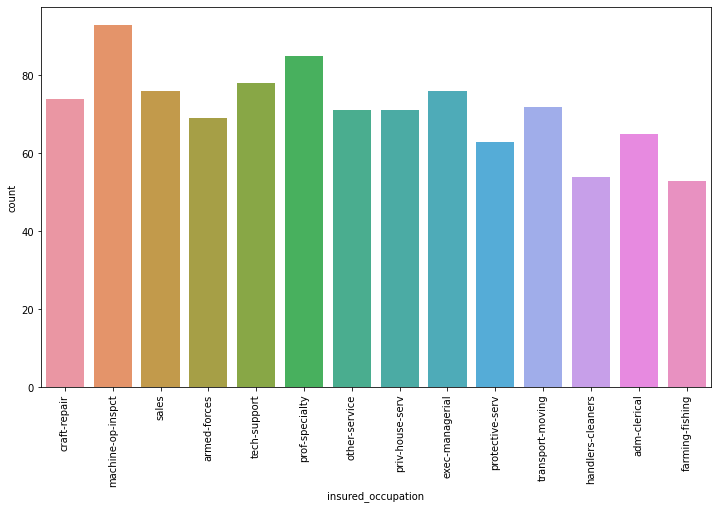

In [55]:
# Plotting insured_occupation column :
plt.figure(figsize=(12,7))
sns.countplot('insured_occupation',data=df)
plt.xticks(rotation=90)
plt.show()

- The highest number of insured customers are in the occupation of machine-op-inspct.
- The lowest number of insured customers are in the occupation of farming-fishing.

In [57]:
#counting the insured_hobbies variable:

df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

- Most of the insured customers are having the hobby of Reading Books followed by exercise,paintball,bungie-jumping etc.   

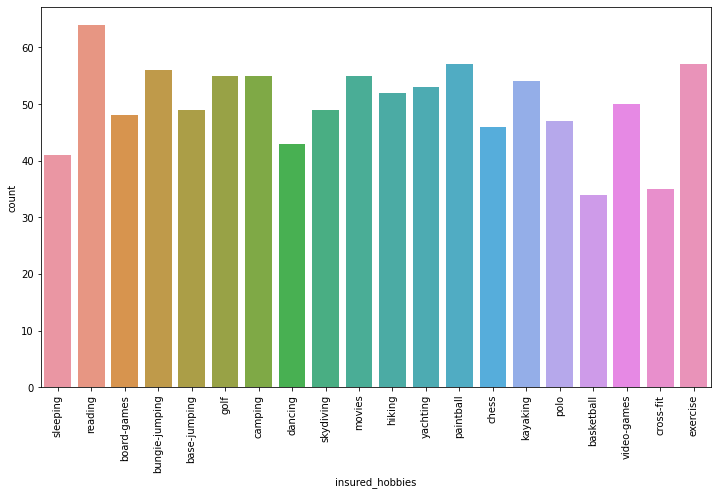

In [58]:
# Plotting the insured_hobbies column :
plt.figure(figsize=(12,7))
sns.countplot('insured_hobbies',data=df)
plt.xticks(rotation=90)
plt.show()

- Most of the insured customers are having the hobby of Reading Books followed by exercise,paintball,bungie-jumping etc.

In [61]:
#counting the insured_relationship variable:

df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

- own-child relationship is highest in number and unmarried is lowest in number.

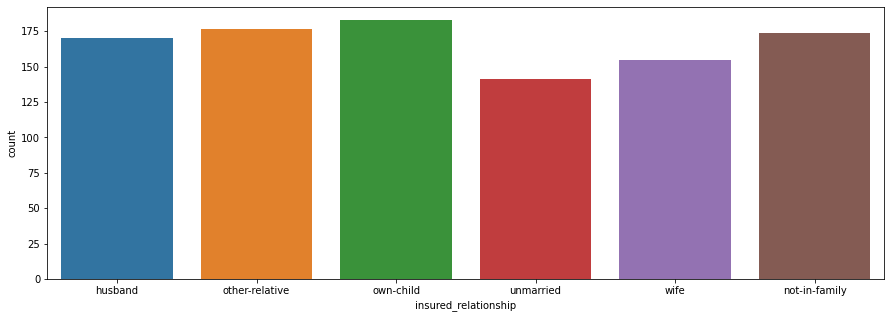

In [62]:
# Plotting insured_relationship column :
plt.figure(figsize=(15,5))
sns.countplot('insured_relationship',data=df)
plt.show()

- own-child relationship is highest in number and unmarried is lowest in number.

Minimum 0
Maximum 100500


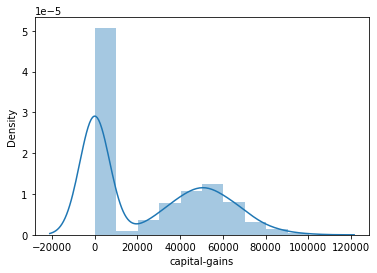

In [63]:
# Plotting the capital-gains column:
sns.distplot(df['capital-gains'])
print('Minimum',df['capital-gains'].min())
print('Maximum',df['capital-gains'].max())

- The data is Rightly skewed.The min amount is 0 and the maximum amount is 100500.

Minimum -111100
Maximum 0


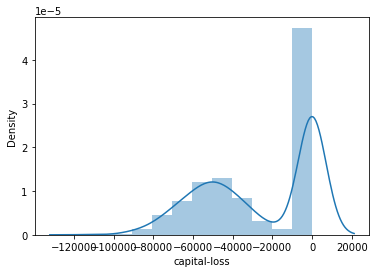

In [64]:
#Plotting the capital-loss column:-
sns.distplot(df['capital-loss'])
print('Minimum',df['capital-loss'].min())
print('Maximum',df['capital-loss'].max())

- The capital loss income is left skewed.The minimum value of capital-loss is -111100 and maximum is zero.

In [65]:
# Feature enineering of the incident date column:

In [66]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [67]:
# Separating the incident column into incident Month,incident Year and incident Day column.

In [576]:
df['incident Month'] = pd.DatetimeIndex(df['incident_date']).month
df['incident Year'] = pd.DatetimeIndex(df['incident_date']).year
df['incident Day'] = df['incident_date'].dt.day

In [68]:
df.drop(['incident_date'],axis=1,inplace=True)# DROP ALERT

- Dropping the incident date colum because we already created the incident Month,incident Year and incident Day column.

In [578]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,Policybind Month,Policybind Year,Policybind Day,incident Month,incident Year,incident Day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,10,2014,17,1,2015,25
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,6,2006,27,1,2015,21
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,6,2000,9,2,2015,22
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,5,1990,25,10,2015,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,2014,6,2,2015,17


- We can see that incident Month,incident Year and incident Day column is created.

In [70]:
#counting the incident_type variable:

df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

- There are four types of incident occured,for which the customers claimed for there insurance bnefit.
- Mostly the accident occurs in Multi-vehicle Collision type.
- Parked car accidents are lowest in number.

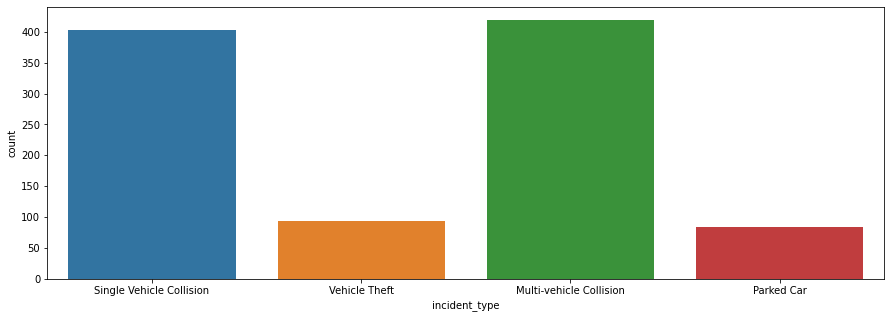

In [71]:
# Plotting incident_type column :
plt.figure(figsize=(15,5))
sns.countplot('incident_type',data=df)
plt.show()

- There are four types of incident occured,for which the customers claimed for there insurance bnefit.
- Mostly the accident occurs in Multi-vehicle Collision type.
- Parked car accidents are lowest in number.

In [72]:
#counting the incident_severity variable:

df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

- The accident which occured caused minor damage mostly,followed by Total loss and Major Damage.
- Trivial Damage is lowest in number.

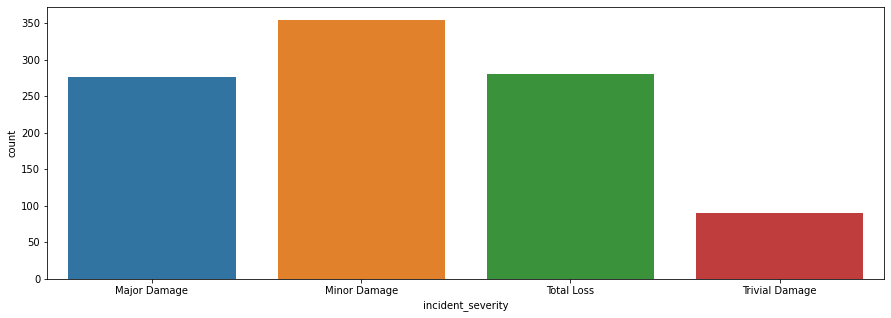

In [73]:
# Plotting incident_severity column :
plt.figure(figsize=(15,5))
sns.countplot('incident_severity',data=df)
plt.show()

- The accident which occured caused minor damage mostly,followed by Total loss and Major Damage.
- Trivial Damage is lowest in number.

In [74]:
#counting the authorities_contacted variable column:

df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

- Mostly the police department is involed when an accident was occured,followed by Fire,others and Ambulance.
- The persons which did not contact any authorities may involved in minor accidents.

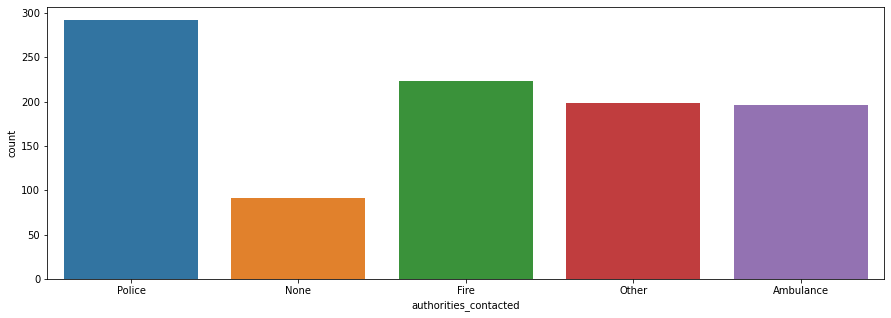

In [75]:
# Plotting authorities_contacted column :
plt.figure(figsize=(15,5))
sns.countplot('authorities_contacted',data=df)
plt.show()

- Mostly the police department is involed when an accident was occured,followed by Fire,others and Ambulance.
- The persons which did not contact any authorities may involved in minor accidents.

In [76]:
#counting the incident_state variable:

df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

- Most of the accidents occured in NY(262) and lowest in OH(23).

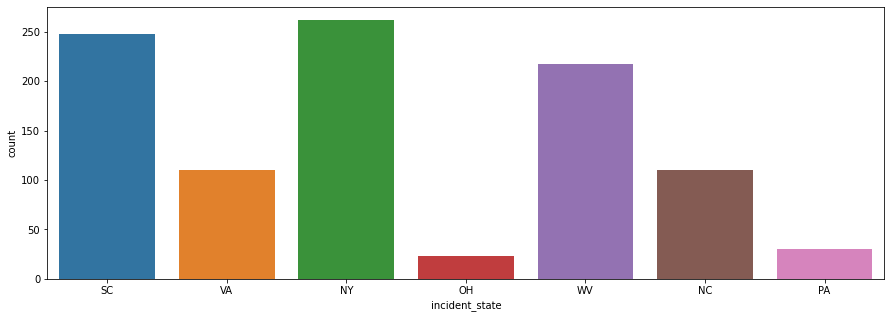

In [77]:
# Plotting incident_state column :
plt.figure(figsize=(15,5))
sns.countplot('incident_state',data=df)
plt.show()

- Most of the accidents occured in NY(262) and lowest in OH(23).

In [78]:
#counting the incident_city variable:

df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

- The highest numbers of the accidents occured in Springfield city,followed by Arlington and Columbus.
- The Lowest no of accidents occured in Northbrook City.

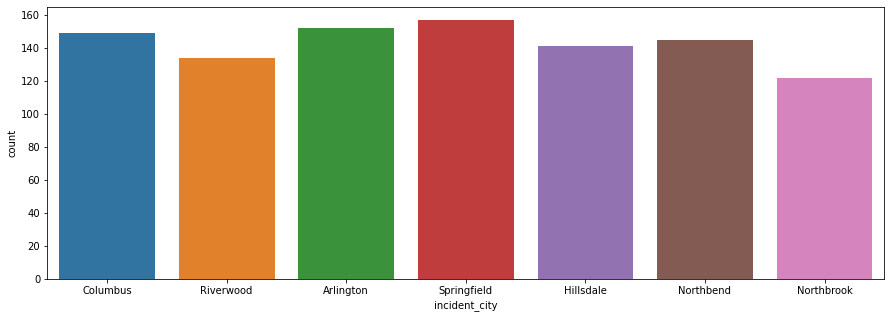

In [79]:
# Plotting incident_city column :
plt.figure(figsize=(15,5))
sns.countplot('incident_city',data=df)
plt.show()

- The highest numbers of the accidents occured in Springfield city,followed by Arlington and Columbus.
- The Lowest no of accidents occured in Northbrook City.

In [80]:
#counting the incident_location variable:

df['incident_location'].value_counts()

7534 MLK Hwy            1
3171 Andromedia Lane    1
1699 Oak Drive          1
8493 Apache Drive       1
1325 1st Lane           1
                       ..
1919 4th Lane           1
5969 Francis St         1
1331 Britain Hwy        1
3172 Tree Ridge         1
4558 3rd Hwy            1
Name: incident_location, Length: 1000, dtype: int64

- This column contains the address of the accident occured.

In [590]:
df.incident_location.unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

- The unique adrresses where the incident occured.

Minimum 1
Maximum 4


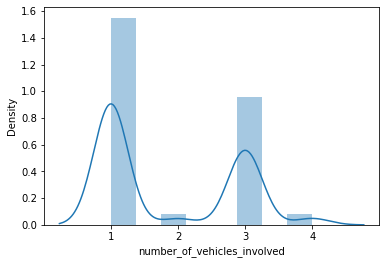

In [81]:
# Plotting the number_of_vehicles_involved:
sns.distplot(df['number_of_vehicles_involved'])
print('Minimum',df['number_of_vehicles_involved'].min())
print('Maximum',df['number_of_vehicles_involved'].max())

- in most of the cases there is only one vehicle is involved.

In [82]:
#counting the property_damage variable:

df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

- Most of the cases didnt dealt with property damage.

<AxesSubplot:ylabel='property_damage'>

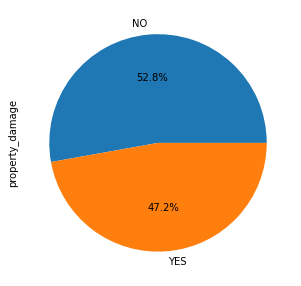

In [83]:
#Plotting the property damage column:
df['property_damage'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- The property damage is invovled in 47.2% cases.

In [84]:
#counting the bodily_injuriesvariable:

df['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

In [ ]:
The bodily injuries is categorised into 0,1 and 2. zero bodily injuries are higher.

<AxesSubplot:ylabel='bodily_injuries'>

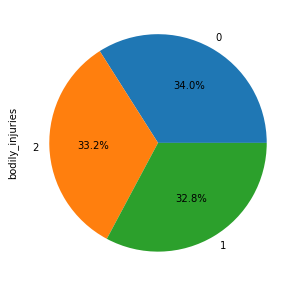

In [85]:
# Plotting the bodily_injuries column:
df['bodily_injuries'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- The bodily injuries is categorised into 0,1 and 2. zero bodily injuries are higher.

In [86]:
#counting the witnesses variable:

df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

- Number of witnesses are euqally disributed in ratio.

<AxesSubplot:ylabel='witnesses'>

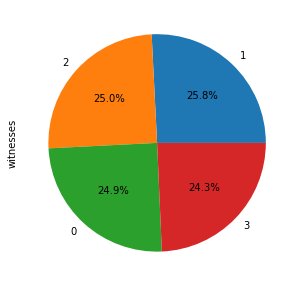

In [87]:
#plotting the witness variable column:
df['witnesses'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- Number of witnesses are euqally disributed in ratio.

In [598]:
#counting the police_report_available variable:

df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

- In most of the cases the police report is not available,which is a major cause or chances of fraud.

<AxesSubplot:ylabel='police_report_available'>

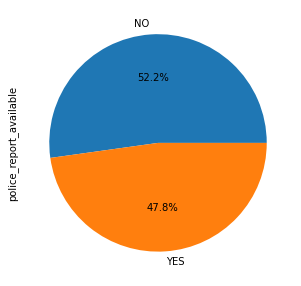

In [88]:
# Plotting the police_report_available:
df['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- About 52.2% of data doest have the police report,which is a major cause or chances of fraud.

Minimum 100
Maximum 114920


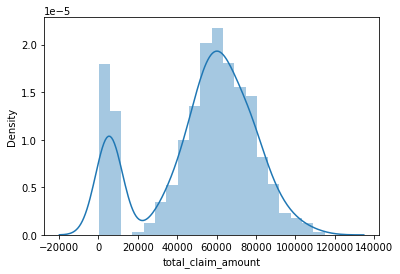

In [89]:
# Plotting the total amount column:
sns.distplot(df['total_claim_amount'])
print('Minimum',df['total_claim_amount'].min())
print('Maximum',df['total_claim_amount'].max())

- The total amount column is somewhat normally distibuted.
- The minimum amout is 100 and the maximum amount is 114920.

Minimum 0
Maximum 21450


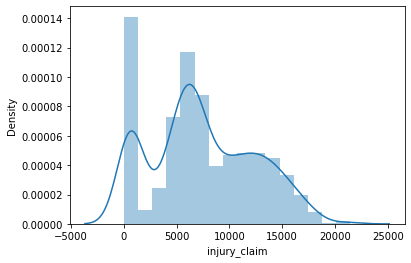

In [90]:
# Plotting the injury claim column:
sns.distplot(df['injury_claim'])
print('Minimum',df['injury_claim'].min())
print('Maximum',df['injury_claim'].max())

- Some of the insurer didnt claimed any insurance.
- The minimum amount is zero and the maximum amount is 21450.

Minimum 0
Maximum 23670


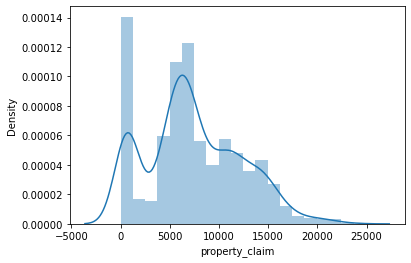

In [92]:
# Plotting the property claim column:
sns.distplot(df['property_claim'])
print('Minimum',df['property_claim'].min())
print('Maximum',df['property_claim'].max())

- The Property claim column is having skewness.
- The Maximum amount climed in Property involved cases is 23670 and minimum amount is zero.

Minimum 70
Maximum 79560


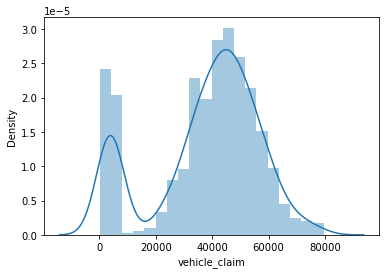

In [93]:
# Plotting the vehicle claim column:
sns.distplot(df['vehicle_claim'])
print('Minimum',df['vehicle_claim'].min())
print('Maximum',df['vehicle_claim'].max())

- The vehicle claim amount is much lesser than the propertyclaim amount.
- The maximum amount claimed in vehicle invoved cases is 79560 and the minimum is 70.

In [94]:
#counting the auto_make variable:

df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

- SAAB,DODGE AND SUBRU are the highest automoble companies which are involved in this insurance claim data ,where Honda company has the lowest cases.

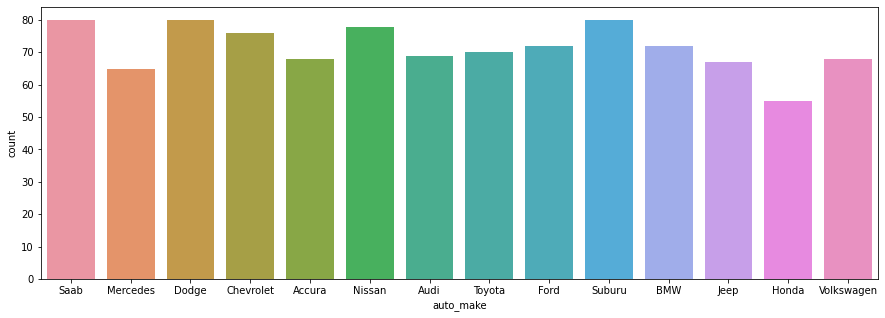

In [95]:
# Plotting auto_make column :
plt.figure(figsize=(15,5))
sns.countplot('auto_make',data=df)
plt.show()

- SAAB,DODGE AND SUBRU are the highest automoble companies which are involved in this insurance claim data ,where Honda company has the lowest cases.

In [96]:
#counting theauto_model variable:

df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Silverado         22
Highlander        22
Civic             22
Fusion            21
Corolla           20
ML350             20
TL                20
Impreza           20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

- RAM,Wrangler and A3 are the leading auto models which are involved in this insured claim data.

# BI VARIATE ANALYSIS:

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

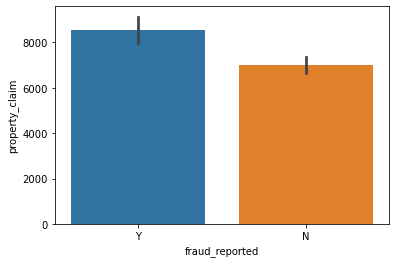

In [99]:
# Plotting Fraud report vs Property claim:
sns.barplot(data=df, x='fraud_reported' , y= 'property_claim')

- It can be seen that there is high number of fraud reported during property claim.

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

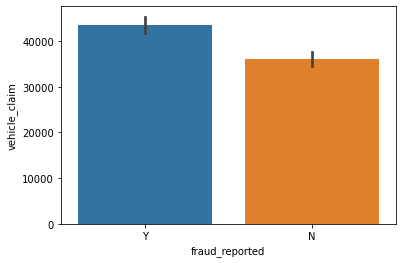

In [101]:
# plotting Fraud reported vs vehicle claim column:
sns.barplot(data=df, x='fraud_reported' , y= 'vehicle_claim')

- It can be seen that there is high number of fraud reported during vehicle claim.

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

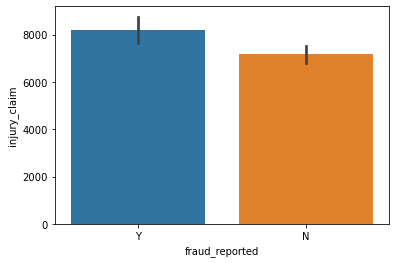

In [100]:
# Plotting fraud reported vs injury claim column:
sns.barplot(data=df, x='fraud_reported' , y= 'injury_claim')

- It can be seen that there is high number of fraud reported during injury claim.

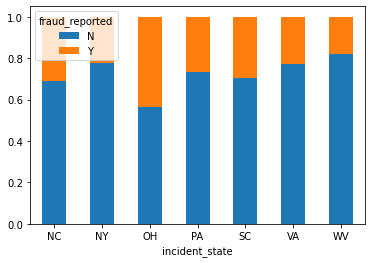

In [102]:
# Plotting incident state vs fraud reported column:
ct = pd.crosstab(df.incident_state, df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=360)
plt.show()

- NY and WV have least chance that the claim is fraud.

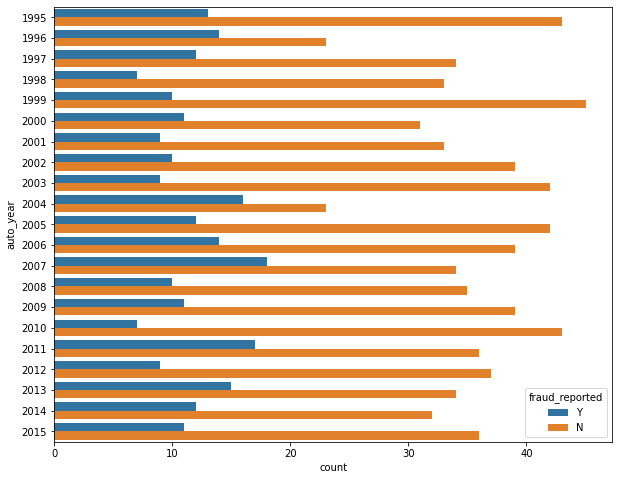

In [103]:
# Plotting Fraud reported vs auto year column:
fig = plt.figure(figsize=(10,8))
sns.countplot(data=df, hue='fraud_reported' , y= 'auto_year')
plt.show()

- the highest no of fraud reported is in the year of 2007.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

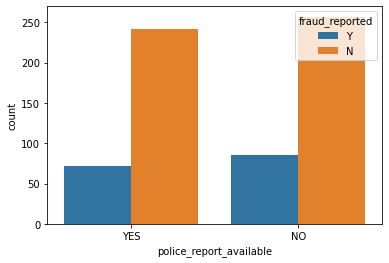

In [104]:
# Plotting Fraud reported vs police_report_available column:
sns.countplot(data=df, hue='fraud_reported' , x= 'police_report_available')

- There are many cases where police report is not avaiable and it increase the chances of fraud.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

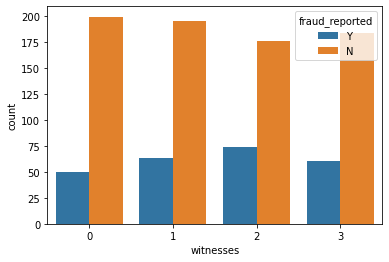

In [105]:
# Plotting fraud reported vs witnesses column:
sns.countplot(data=df, hue='fraud_reported' , x= 'witnesses')

- Fraud claim is likely if having 2 witnesses.

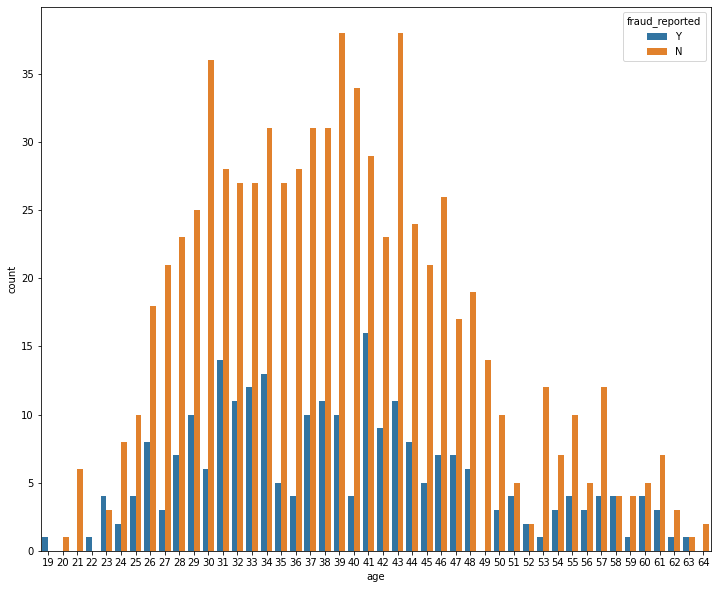

In [106]:
# Plotting fraud_reported and age column:
fig = plt.figure(figsize=(12,10))
sns.countplot(data=df, hue='fraud_reported' , x= 'age')
plt.show()

- With higher age the fraud report on the claims reduce, but from the age of 23 to 48 the number of fraud report is high , also it is seen that for age lower than 19 there is fraud report on the claim.

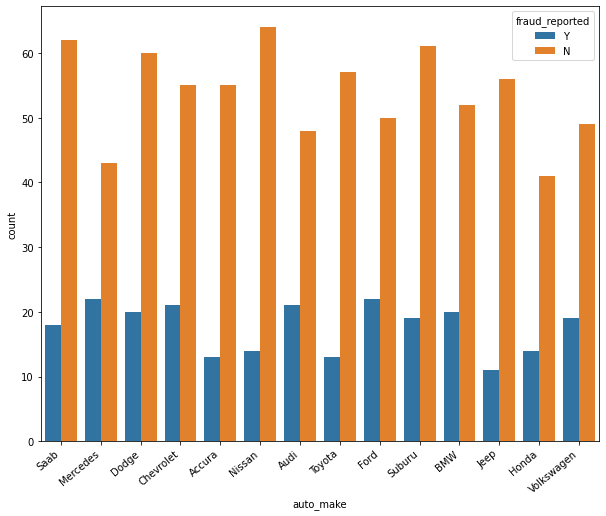

In [107]:
# Plotting Fraud reported and auto make column:
fig = plt.figure(figsize=(10,8))
ax=sns.countplot(data=df, hue='fraud_reported' , x= 'auto_make')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

- Although for all the models each have reported fraud insurence, Nissan has the higest number of non- fraud reported on its claim.

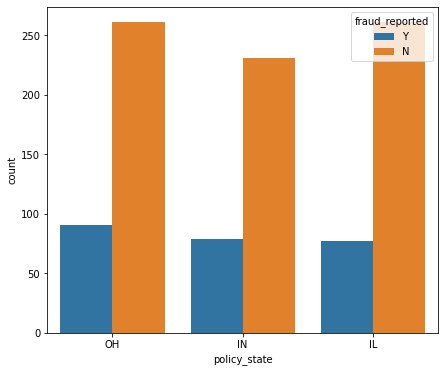

In [108]:
# Plotting the fraud reported vs policy state column:
fig = plt.figure(figsize=(7,6))
sns.countplot(data=df, hue='fraud_reported' , x= 'policy_state')
plt.show()

- It can be seen that in each of the state inurence fraud has occured more or less.

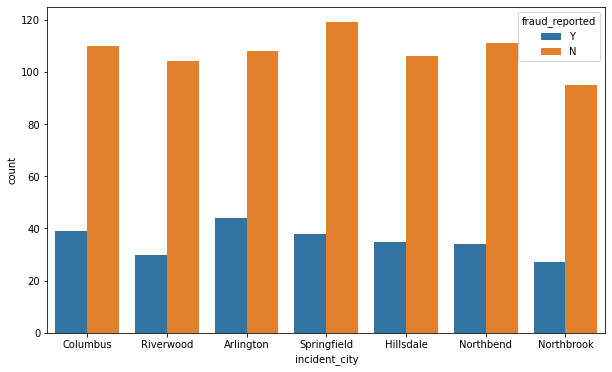

In [109]:
# Plotting incident City vs FRaud reported column:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'incident_city', hue= 'fraud_reported', data=df) 
plt.show()

- Chances of fraud claim is likely in city of Arlington and Columbus.

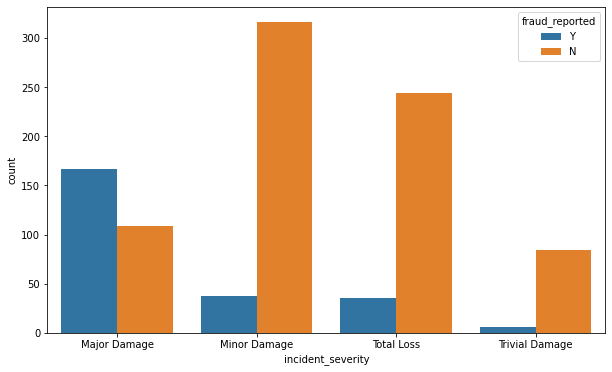

In [110]:
# Plotting incident_severity vs fraud_reported column:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'incident_severity', hue= 'fraud_reported', data=df) 
plt.show()

- In case of major damages the fraud reported is higher.

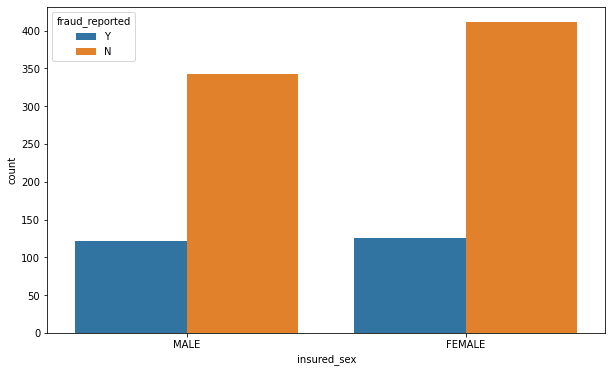

In [111]:
# Plotting insured sex and fraud reported column:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'insured_sex', hue= 'fraud_reported', data=df) 
plt.show()

- Sex has no relation with the Fraud.

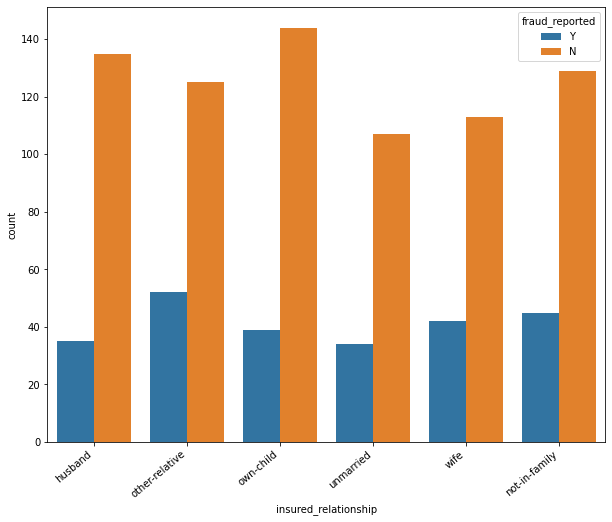

In [112]:
# Plotting insured relationship vs fraud reported column:
fig = plt.figure(figsize=(10,8))
ax= sns.countplot(x = 'insured_relationship', hue= 'fraud_reported', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

- Insured relationship 'other-relative' has higher chance of fraud.

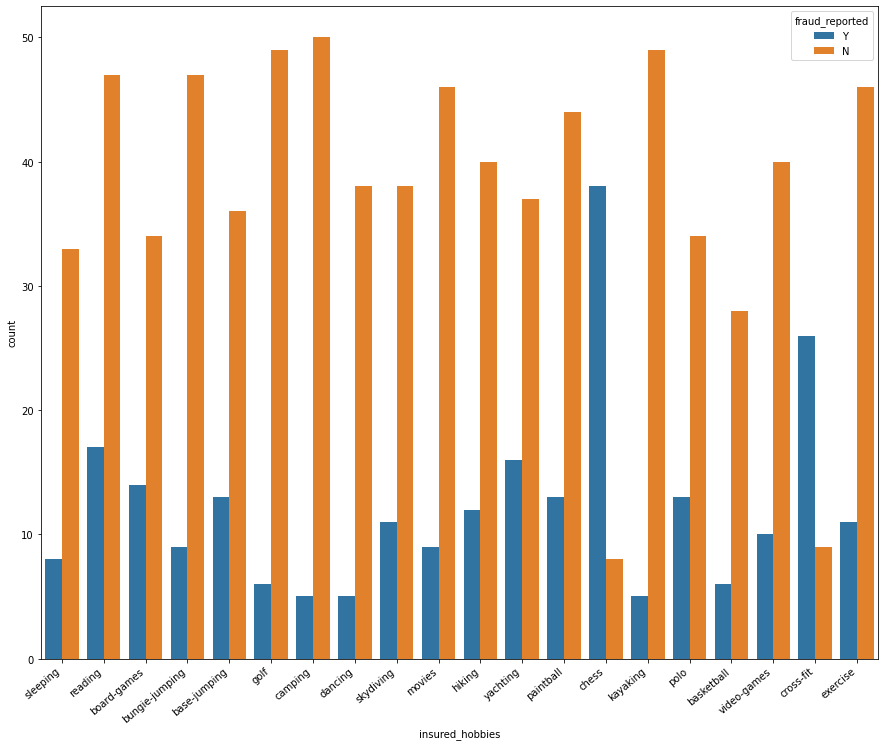

In [113]:
# Plotting insured_hobbies and fraud_reported column:
fig = plt.figure(figsize=(15,12))
ax= sns.countplot(x = 'insured_hobbies', hue= 'fraud_reported', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

- People who has Chess and crossfit as hobbies are most likely that their claim is fraud.

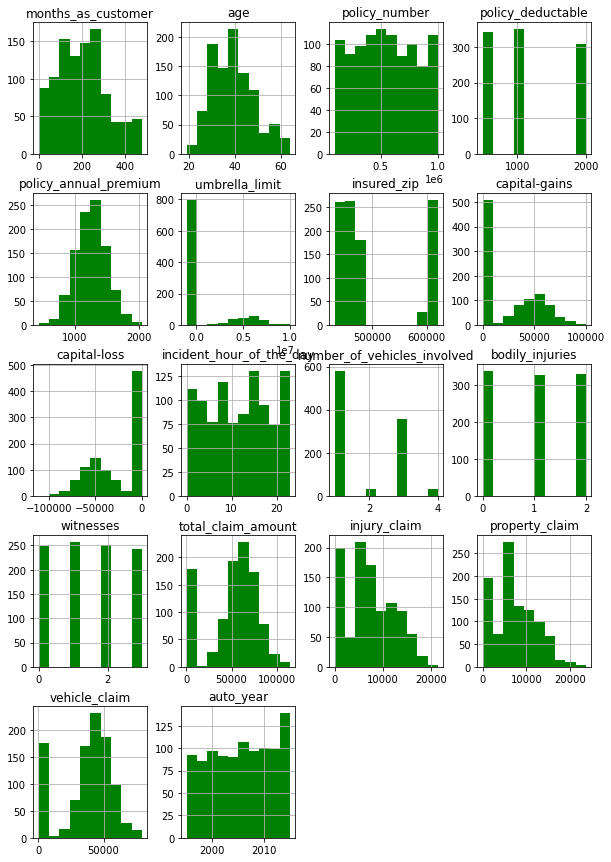

In [115]:
# Checking normal distribution:
df.hist(figsize=(10,15),color = 'green');

 - There is skewness in most of the columns.

<AxesSubplot:xlabel='capital-gains', ylabel='capital-loss'>

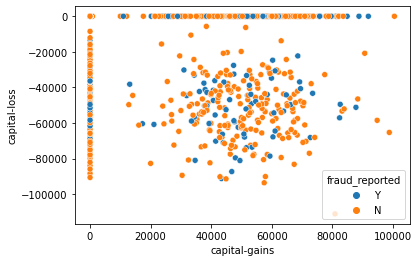

In [116]:
# Plotting capital-loss vs capital-loss' vs fraud_reported:
sns.scatterplot(x='capital-gains', y ='capital-loss', hue='fraud_reported',data=df)

- There is no such relation between fraud reported with capital-gains and capital-loss column.

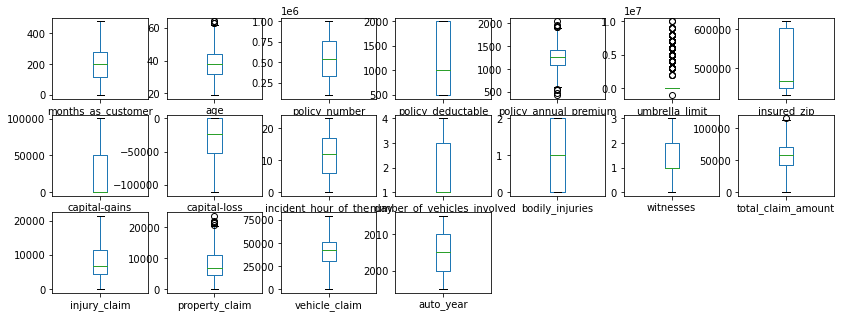

In [117]:
# Checking for outliers:
df.plot(kind='box',subplots=True,layout=(8,7),figsize=(14,14))
plt.show()

- Umbrella limit and property claim has outliers present.

In [118]:
# Checking skewness:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

- We can see that umbrella_limit is having skewness.

In [120]:
# Converting the class fraud_reported column into numerical using Label encoder:

In [627]:
l = LabelEncoder()
l_s = ['fraud_reported']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [628]:
#### dividing the feature and label for further operations:
y = df['fraud_reported']
x = df.drop(columns=['fraud_reported'])

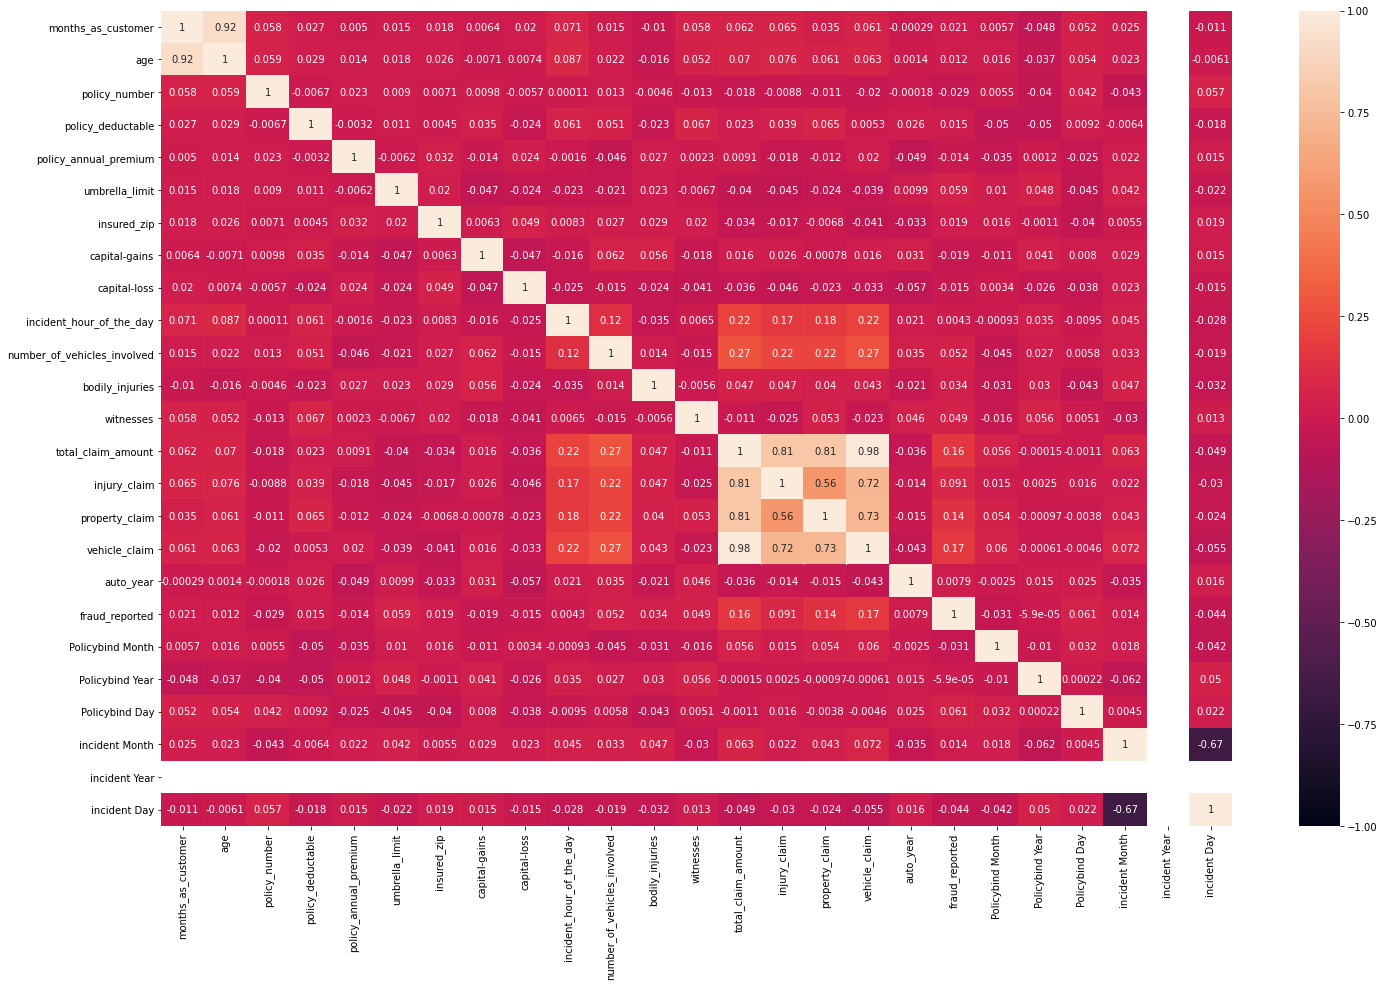

In [629]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.
plt.figure(figsize=[24,15])
sns.heatmap(df.corr(), annot=True,vmin=-1 , vmax=1)
plt.show()

- features like 'Vechicle_claim', 'property_claim','Injury_claim' and 'total_claim_amount' are all highly coorelated with each other.
- columns like 'incient_hour_of_the_day'and 'number of vechilcle_involved' are coorrlated but with a lesser value.

In [121]:
# Encoding all the object columns into numerical by using Ordinal encoder:

In [630]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,Policybind Month,Policybind Year,Policybind Day,incident Month,incident Year,incident Day
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,10.0,1.0,2004,1,10,2014,17,1,2015,25
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,8.0,12.0,2007,1,6,2006,27,1,2015,21
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,4.0,30.0,2007,0,6,2000,9,2,2015,22
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,3.0,34.0,2014,1,5,1990,25,10,2015,1
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,0.0,31.0,2009,0,6,2014,6,2,2015,17


- we can see that all the object type columns are converted into numerical,now we can put this data into model for further prediction.

In [122]:
# Checking skewness again:-
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

- We can see that umbrella_limit and incident Month is having skewness.we will use power transformer to reduce the skewness.

In [632]:
features=['umbrella_limit','incident Month']

In [633]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [634]:
df[features]=scaler.fit_transform(df[features].values)#scaling the features

In [635]:
df[features]

,umbrella_limit,incident Month
0,-0.349113,-1.100457
1,1.357817,-1.100457
2,1.357817,-0.025412
3,1.644005,1.553521
4,1.644005,-0.025412
...,...,...
995,-0.349113,-0.025412
996,-0.349113,-1.100457
997,0.756509,-1.100457
998,1.357817,-0.025412


In [636]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                -7.865930
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


- We can see that there is still skewness present in the data.

In [638]:
df.drop(['policy_number','incident_location','injury_claim','property_claim','vehicle_claim','incident Year'],axis=1,inplace=True)

- Dropping the policy number and incident _location column because both have the same entries.
- Dropping the injury_claim,property_claim and vehicle_claim because we are getting the summation of this column in Total claim amount.
- Dropping the incident year column because it has no relation with the fraud reported.

In [123]:
# Separating the features and columns:

In [639]:
y=df['fraud_reported']
x=df.drop(columns=['fraud_reported'])

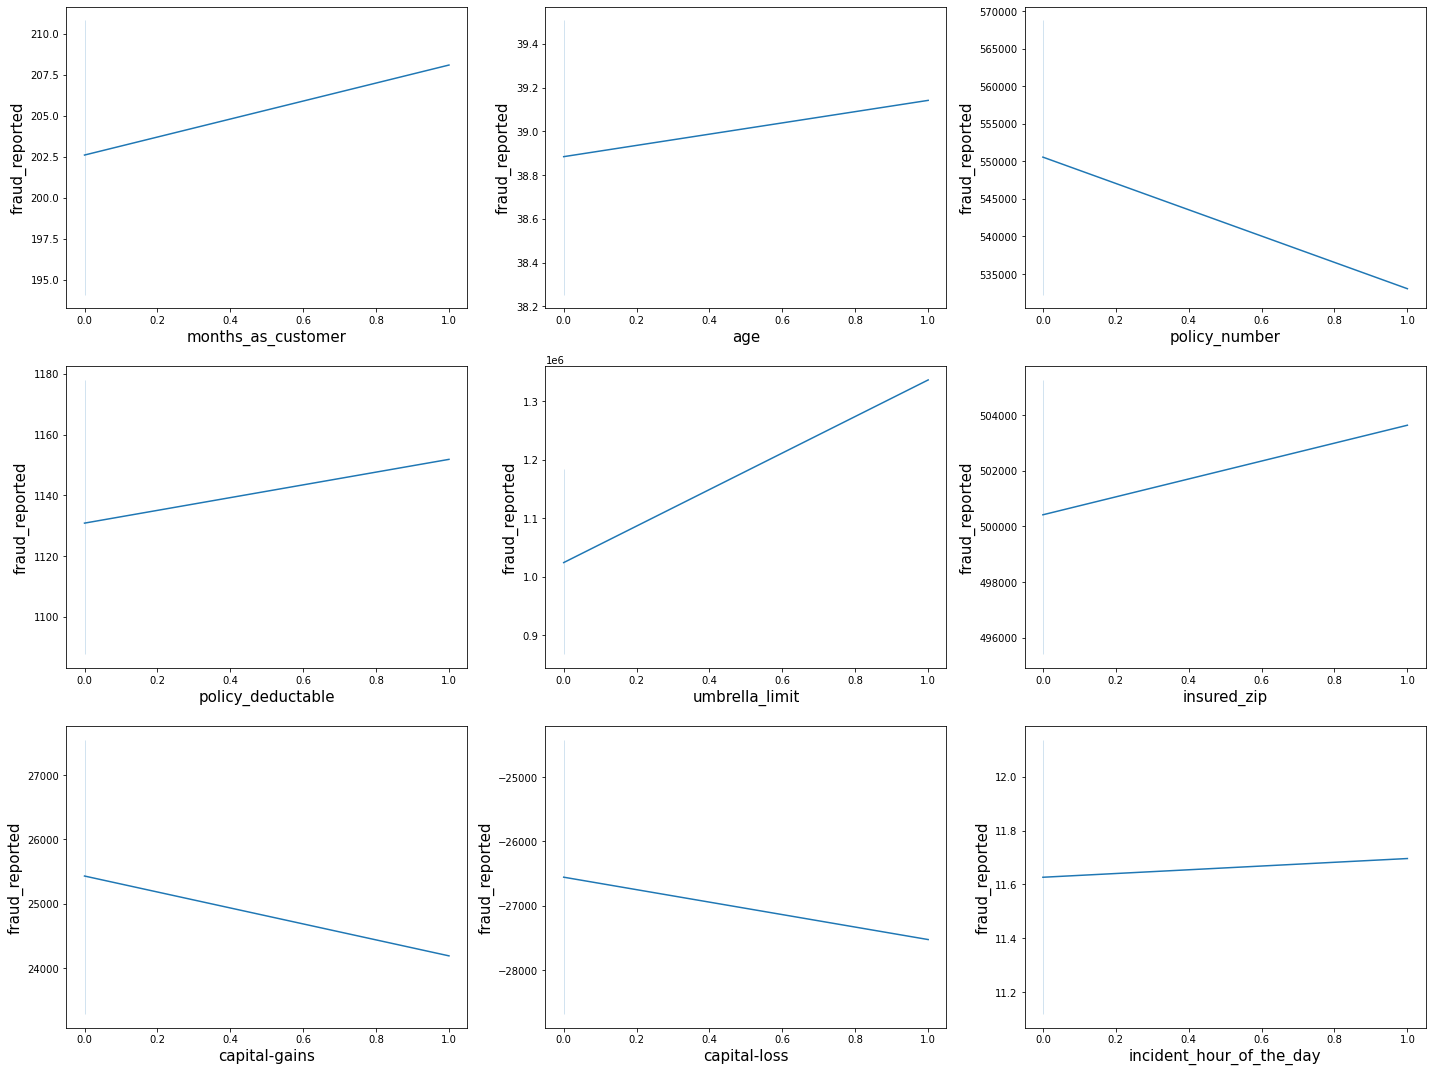

In [663]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.lineplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('fraud_reported',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# The class fraud_reported was imbalanced,balanced the class with the help of using SMOTE.

In [640]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [641]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

- We can see that the class is balanced now.

# STANDARDIZATION:

In [642]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# VIF:

In [643]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.278612,months_as_customer
1,7.273350,age
2,1.059377,policy_state
3,1.038118,policy_csl
4,1.050490,policy_deductable
5,1.058642,policy_annual_premium
6,1.030532,umbrella_limit
7,1.067589,insured_zip
8,1.047692,insured_sex
9,1.059648,insured_education_level


# HOLD OUT METHOD

In [644]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=82)

# BUILDING MODELS:

# 1.LOGISTIC REGRESSION:

In [645]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:78.92%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.807252    0.773554  0.789194     0.790403      0.790268
recall       0.755357    0.822496  0.789194     0.788926      0.789194
f1-score     0.780443    0.797274  0.789194     0.788859      0.788926
support    560.000000  569.000000  0.789194  1129.000000   1129.000000
 Confusion Matrix:
[[423 137]
 [101 468]]



In [646]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:74.27%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.760870    0.725389  0.742706    0.743129      0.743553
recall       0.725389    0.760870  0.742706    0.743129      0.742706
f1-score     0.742706    0.742706  0.742706    0.742706      0.742706
support    193.000000  184.000000  0.742706  377.000000    377.000000
 Confusion Matrix:
[[140  53]
 [ 44 140]]



In [647]:
roc_auc_score(y_test,lr.predict(x_test))

0.7431290831268303

# 2. DECISION TREE CLASSIFIER:

In [648]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    560.0  569.0       1.0     1129.0        1129.0
 Confusion Matrix:
[[560   0]
 [  0 569]]



In [649]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:85.94%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.876344    0.842932  0.859416    0.859638      0.860037
recall       0.844560    0.875000  0.859416    0.859780      0.859416
f1-score     0.860158    0.858667  0.859416    0.859412      0.859430
support    193.000000  184.000000  0.859416  377.000000    377.000000
 Confusion Matrix:
[[163  30]
 [ 23 161]]



In [650]:
roc_auc_score(y_test,dt.predict(x_test))

0.859779792746114

# 3. RANDOM FORREST CLASSIFIER:

In [651]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    560.0  569.0       1.0     1129.0        1129.0
 Confusion Matrix:
[[560   0]
 [  0 569]]



In [652]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")

Accuracy score:88.33%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894180    0.872340  0.883289    0.883260      0.883521
recall       0.875648    0.891304  0.883289    0.883476      0.883289
f1-score     0.884817    0.881720  0.883289    0.883269      0.883306
support    193.000000  184.000000  0.883289  377.000000    377.000000
 Confusion Matrix:
[[169  24]
 [ 20 164]]



In [653]:
roc_auc_score(y_test,rf.predict(x_test))

0.8834760081099347

# 4.KNEIGHBORS CLASSIFIER:

In [654]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:70.50%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.967078    0.633183  0.705049     0.800131      0.798800
recall       0.419643    0.985940  0.705049     0.702792      0.705049
f1-score     0.585305    0.771134  0.705049     0.678220      0.678960
support    560.000000  569.000000  0.705049  1129.000000   1129.000000
 Confusion Matrix:
[[235 325]
 [  8 561]]



In [655]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:59.95%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.937500    0.550152  0.599469    0.743826      0.748450
recall       0.233161    0.983696  0.599469    0.608428      0.599469
f1-score     0.373444    0.705653  0.599469    0.539549      0.535583
support    193.000000  184.000000  0.599469  377.000000    377.000000
 Confusion Matrix:
[[ 45 148]
 [  3 181]]



In [656]:
roc_auc_score(y_test,kn.predict(x_test))

0.6084281369677855

# 5. SUPPORT VECTOR CLASSIFIER:

In [657]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:95.66%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.760870    0.725389  0.742706    0.743129      0.743553
recall       0.725389    0.760870  0.742706    0.743129      0.742706
f1-score     0.742706    0.742706  0.742706    0.742706      0.742706
support    193.000000  184.000000  0.742706  377.000000    377.000000
 Confusion Matrix:
[[545  15]
 [ 34 535]]



In [658]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:85.15%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.854922    0.847826  0.851459    0.851374      0.851459
recall       0.854922    0.847826  0.851459    0.851374      0.851459
f1-score     0.854922    0.847826  0.851459    0.851374      0.851459
support    193.000000  184.000000  0.851459  377.000000    377.000000
 Confusion Matrix:
[[165  28]
 [ 28 156]]



In [659]:
roc_auc_score(y_test,svc.predict(x_test))

0.851374183374634

# 6.GRADIENT BOOSTING CLASSIFIER:

In [660]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_train)
gbc_clf_report = pd.DataFrame(classification_report(y_train,gbc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,gbc_pred)}\n")

Accuracy score:96.63%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.969424    0.963351  0.966342     0.966388      0.966363
recall       0.962500    0.970123  0.966342     0.966312      0.966342
f1-score     0.965950    0.966725  0.966342     0.966337      0.966341
support    560.000000  569.000000  0.966342  1129.000000   1129.000000
 Confusion Matrix:
[[539  21]
 [ 17 552]]



In [661]:
gbc_pred=gbc.predict(x_test)
gbc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,gbc_pred)}\n")

Accuracy score:89.39%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.854922    0.847826  0.851459    0.851374      0.851459
recall       0.854922    0.847826  0.851459    0.851374      0.851459
f1-score     0.854922    0.847826  0.851459    0.851374      0.851459
support    193.000000  184.000000  0.851459  377.000000    377.000000
 Confusion Matrix:
[[168  25]
 [ 15 169]]



In [662]:
roc_auc_score(y_test,gbc.predict(x_test))

0.8944722910565442

# CROSS VALIDATION SCORE:

In [168]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:54.71%


In [169]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:84.53%


In [170]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:85.93%


In [171]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:60.22%


In [172]:
print(f"CV Score of SVC:{cross_val_score(gbc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:87.00%


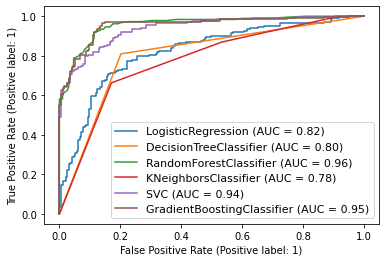

In [173]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- We chose Random forest model as the best model because we got least differnce in accuracy score and cross validation score,which is 88.3-85.3=3.

# Hyper Parameter tuning of the Random forrest Model:

In [174]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [175]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [176]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [177]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 17}


In [178]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=30,min_samples_leaf = 5, min_samples_split=14,n_estimators =17)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8912466843501327

- After Hyper Parameter Tuning we got the score of 89.12%.

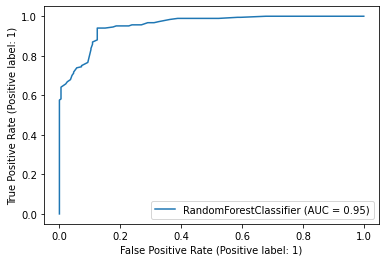

In [665]:
disp = plot_roc_curve(rf,x_test,y_test)

In [666]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_insurance = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_insurance))

      predicted_values  orignal_values
525                  0               0
1498                 1               1
998                  1               0
1436                 1               1
725                  0               0
...                ...             ...
549                  0               0
551                  0               0
1179                 1               1
371                  0               0
39                   1               1

[377 rows x 2 columns]


In [667]:
#import joblib
import joblib

joblib.dump(rf,'rfc_insurance_file.obj')

# SAVING THE MODEL

['rfc_insurance_file.obj']

In [668]:
rf_from_joblib=joblib.load('rfc_insurance_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

# CONCLUSION:

- The machine learning models that are discussed and applied on the dataset were able to identify most of the fraudulent cases with a low false positive rate i.e. with a reasonable precision. This enables loss control units to focus on new fraud scenarios and ensuring that the model is adapting to identify them. Certain dataset had severe challenges around data quality, resulting in relatively poor levels of prediction. Given inherent characteristics of various dataset, it would be impractical to define optimal algorithmic techniques or recommended feature engineering for best performance. However, it would be reasonable to suggest that based on the model performance on back-testing and ability to identify new frauds, the set of models offer a reasonable suite to apply in the area of insurance claims fraud. The model would then be tailored for the specific business context and user priorities.In this dataset random forrest model gave the accuracy score of approx 90%,which will be helpful for further auto fraud detection.